#How to forcast any price in Python

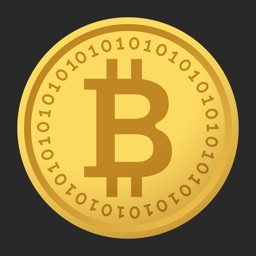
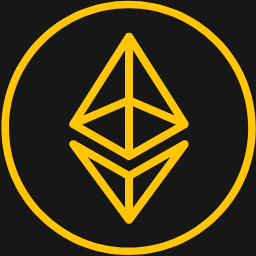
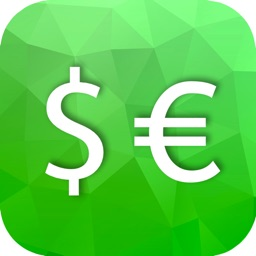

# Forecasting Stocks from investpy and Prophet (from facebook API in python)

##Lets install investpy

In [5]:
!pip install git+https://github.com/alvarobartt/investpy.git@master


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/alvarobartt/investpy.git (to revision master) to /tmp/pip-req-build-i3rfdp42
  Running command git clone -q https://github.com/alvarobartt/investpy.git /tmp/pip-req-build-i3rfdp42
     |████████████████████████████████| 235 kB 5.1 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4487675 sha256=9ac94d68e9d0ffa3a38fcedbc2523217068ceed2fd9c0a9dc7eabc4ea2078ecc
  Stored in directory: /tmp/pip-ephem-wheel-cache-ylzj6fph/wheels/28/e8/a3/0aae81fea40d334652a71f3593a37743646e63fcde2d8a8678
Successfully built investpy


##Collecting apple data from investing.com

In [6]:
import investpy

df = investpy.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date='01/01/2010',
                                        to_date='01/01/2020')
print(df.head())

            Open  High   Low  Close     Volume Currency
Date                                                   
2010-01-04  7.62  7.66  7.58   7.64  493728704      USD
2010-01-05  7.66  7.70  7.62   7.66  601904640      USD
2010-01-06  7.66  7.69  7.53   7.53  552158912      USD
2010-01-07  7.56  7.57  7.47   7.52  477129760      USD
2010-01-08  7.51  7.57  7.47   7.57  447876768      USD


In [7]:
import pandas as pd
import investpy

df = pd.DataFrame()

search_result = investpy.search_quotes(text='apple', products=['stocks'],
                                       countries=['united states'], n_results=1)

historical_data = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='01/01/2020')
historical_data.head()
df["ds"] = historical_data.index
df["y"] = historical_data['Close'].values

##Predict apple company stock 

In [8]:
from prophet import Prophet
import pandas as pd

df = pd.DataFrame()

search_result = investpy.search_quotes(text='apple', products=['stocks'],
                                       countries=['united states'], n_results=1)

historical_data = search_result.retrieve_historical_data(from_date='01/01/2019', to_date='01/01/2020')
historical_data.head()
df["ds"] = historical_data.index
df["y"] = historical_data['Close'].values
m = Prophet()
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnmcvw00a/vrfmzcgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnmcvw00a/12mco0ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67148', 'data', 'file=/tmp/tmpnmcvw00a/vrfmzcgo.json', 'init=/tmp/tmpnmcvw00a/12mco0ky.json', 'output', 'file=/tmp/tmpwmr0lqop/prophet_model-20220827031340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:13:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:13:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,37.333243,35.465469,38.769022,37.333243,37.333243,-0.283011,-0.283011,-0.283011,-0.283011,-0.283011,-0.283011,0.0,0.0,0.0,37.050232
1,2019-01-03,37.461723,35.402110,38.552172,37.461723,37.461723,-0.397441,-0.397441,-0.397441,-0.397441,-0.397441,-0.397441,0.0,0.0,0.0,37.064282
2,2019-01-04,37.590204,35.579682,38.782639,37.590204,37.590204,-0.374484,-0.374484,-0.374484,-0.374484,-0.374484,-0.374484,0.0,0.0,0.0,37.215720
3,2019-01-07,37.975645,35.758751,39.169388,37.975645,37.975645,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,0.0,0.0,0.0,37.533026
4,2019-01-08,38.104125,35.967468,39.207084,38.104125,38.104125,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,0.0,0.0,0.0,37.552686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2020-12-26,135.581213,96.925143,174.854111,96.117130,174.072891,1.024497,1.024497,1.024497,1.024497,1.024497,1.024497,0.0,0.0,0.0,136.605710
613,2020-12-27,135.755022,97.013743,174.384107,96.053903,174.382953,1.024497,1.024497,1.024497,1.024497,1.024497,1.024497,0.0,0.0,0.0,136.779519
614,2020-12-28,135.928831,95.597101,173.682173,96.033406,174.575746,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,0.0,0.0,0.0,135.486212
615,2020-12-29,136.102640,95.307286,173.658523,96.012908,174.768539,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,0.0,0.0,0.0,135.551201


##DO it for 365 days

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/76ief4jg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/d723vxyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34841', 'data', 'file=/tmp/tmpizcgunrn/76ief4jg.json', 'init=/tmp/tmpizcgunrn/d723vxyt.json', 'output', 'file=/tmp/tmp0abp5fou/prophet_model-20220827000548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:05:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:05:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,37.333243,35.383099,38.736682,37.333243,37.333243,-0.283011,-0.283011,-0.283011,-0.283011,-0.283011,-0.283011,0.0,0.0,0.0,37.050232
1,2019-01-03,37.461723,35.349815,38.836172,37.461723,37.461723,-0.397441,-0.397441,-0.397441,-0.397441,-0.397441,-0.397441,0.0,0.0,0.0,37.064282
2,2019-01-04,37.590204,35.710341,38.909844,37.590204,37.590204,-0.374484,-0.374484,-0.374484,-0.374484,-0.374484,-0.374484,0.0,0.0,0.0,37.215720
3,2019-01-07,37.975645,35.906313,39.126477,37.975645,37.975645,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,0.0,0.0,0.0,37.533026
4,2019-01-08,38.104125,36.069038,39.135127,38.104125,38.104125,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,0.0,0.0,0.0,37.552686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2020-12-26,135.581213,94.872294,172.802719,94.537072,171.496781,1.024497,1.024497,1.024497,1.024497,1.024497,1.024497,0.0,0.0,0.0,136.605710
613,2020-12-27,135.755022,95.245565,173.565030,94.495752,171.846158,1.024497,1.024497,1.024497,1.024497,1.024497,1.024497,0.0,0.0,0.0,136.779519
614,2020-12-28,135.928831,94.278584,171.205131,94.482529,172.083850,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,0.0,0.0,0.0,135.486212
615,2020-12-29,136.102640,93.678462,172.085083,94.401117,172.287434,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,0.0,0.0,0.0,135.551201


##Predict it for 3 years

In [ ]:
future = m.make_future_dataframe(3*365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1340,2022-12-24,263.138751,40.586006,484.385470
1341,2022-12-25,263.312560,41.762030,485.756261
1342,2022-12-26,262.019253,39.955662,484.405165
1343,2022-12-27,262.084242,39.490693,484.708171
1344,2022-12-28,262.526480,38.446875,484.532617
1345,2022-12-29,262.585859,39.475072,485.874315
1346,2022-12-30,262.782625,39.207190,487.113691


##Plot the results

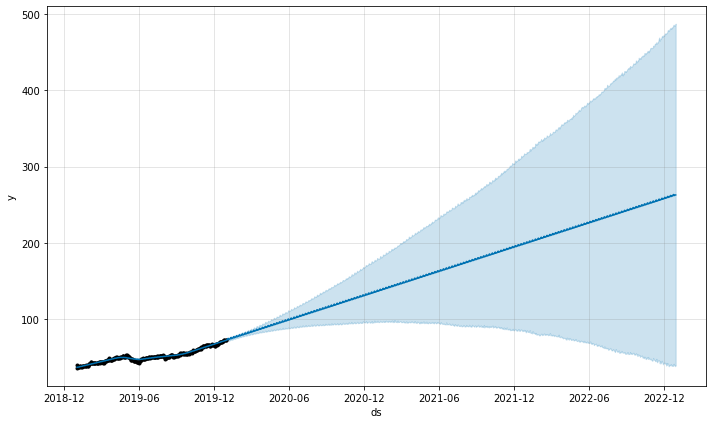

In [ ]:
m.plot(forecast);

## Make it a Function

#### Make some Forecasts with that Function

In [ ]:
def ForecastFuture(StockName, Periods, FromDate,Todate):

  import pandas as pds
  from prophet import Prophet

  pds = pds.DataFrame()

  search_result = investpy.search_quotes(text=StockName, products=['stocks'],
                                        countries=['united states'], n_results=1)

  historical_data = search_result.retrieve_historical_data(from_date=FromDate, to_date=Todate)
  historical_data.head()
  pds["ds"] = historical_data.index
  pds["y"] = historical_data['Close'].values
  m = Prophet()
  m.fit(pds)  # df is a pandas.DataFrame with 'y' and 'ds' columns
  future = m.make_future_dataframe(periods=Periods, freq='D')
  forecast=m.predict(future)
  m.plot(forecast)

  return forecast

##Forcast Up to 2025
### As you can see the 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/a6fpqr40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/48xfbvwb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13427', 'data', 'file=/tmp/tmpizcgunrn/a6fpqr40.json', 'init=/tmp/tmpizcgunrn/48xfbvwb.json', 'output', 'file=/tmp/tmpaccgq415/prophet_model-20220827014756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:47:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2011,2025-08-21,-634.167907,-1036.378996,-136.016916,-1062.660147,-162.506475,24.809764,24.809764,24.809764,2.498876,2.498876,2.498876,22.310888,22.310888,22.310888,0.0,0.0,0.0,-609.358143
2012,2025-08-22,-634.868427,-1040.092315,-135.118681,-1063.933618,-162.621071,25.881042,25.881042,25.881042,2.684456,2.684456,2.684456,23.196586,23.196586,23.196586,0.0,0.0,0.0,-608.987385
2013,2025-08-23,-635.568946,-1047.396897,-145.220031,-1065.188568,-162.710302,17.112373,17.112373,17.112373,-6.940108,-6.940108,-6.940108,24.052480,24.052480,24.052480,0.0,0.0,0.0,-618.456574
2014,2025-08-24,-636.269466,-1050.233140,-153.790611,-1066.384584,-162.826811,17.923987,17.923987,17.923987,-6.940100,-6.940100,-6.940100,24.864087,24.864087,24.864087,0.0,0.0,0.0,-618.345479
2015,2025-08-25,-636.969986,-1038.059679,-127.165612,-1067.580600,-162.943320,28.385730,28.385730,28.385730,2.768684,2.768684,2.768684,25.617046,25.617046,25.617046,0.0,0.0,0.0,-608.584256


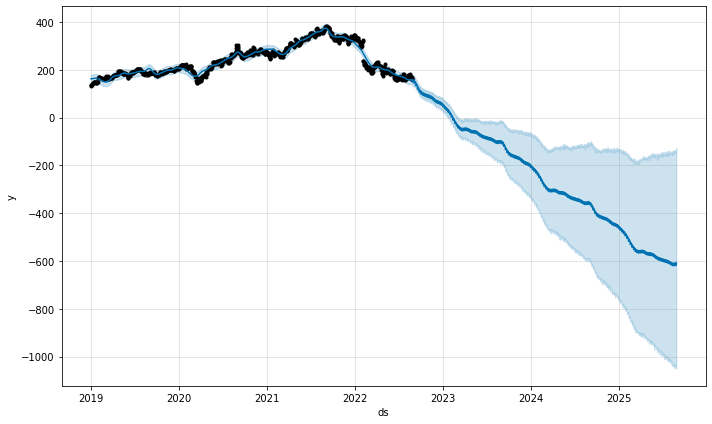

In [ ]:
# Forcast Meta Company stock
ForecastFuture('META', 3*365 ,'01/01/2019','26/08/2022').tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/tn4_l2rm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/pk82fwwk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6662', 'data', 'file=/tmp/tmpizcgunrn/tn4_l2rm.json', 'init=/tmp/tmpizcgunrn/pk82fwwk.json', 'output', 'file=/tmp/tmpphbj6l_s/prophet_model-20220827015126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:51:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:51:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
667,2022-01-01,40.183305,36.374857,43.929293
668,2022-01-02,40.368345,36.508632,44.142762
669,2022-01-03,45.212246,41.453677,49.038389
670,2022-01-04,45.505246,41.692508,49.380868
671,2022-01-05,45.623705,41.630650,49.485041
...,...,...,...,...
1027,2022-12-27,27.803943,12.621380,42.577730
1028,2022-12-28,28.056817,12.153717,43.403805
1029,2022-12-29,28.252369,11.724616,43.482090
1030,2022-12-30,28.602933,12.341824,43.543791


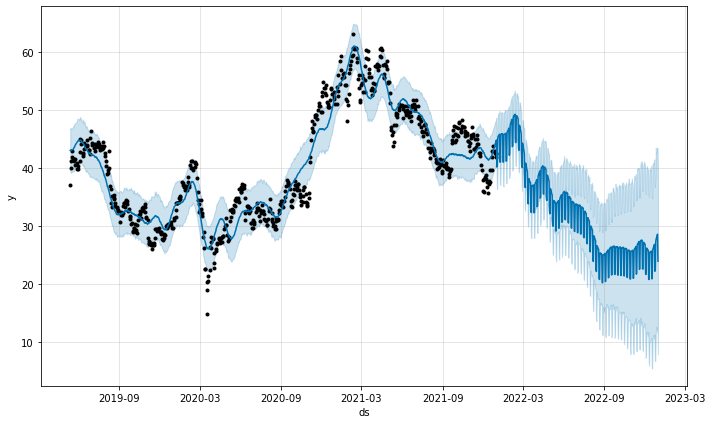

In [ ]:
n = 365  # set variable for number of days to predict

# uber
uber_forecast = ForecastFuture('UBER', n, '01/01/2019','01/01/2022')

# only keep the future forecast, and forget most columns
uber_forecast = uber_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

uber_forecast

##Crypto currency

In [ ]:
def ForecastCryptoFuture(CryptoName, Periods, FromDate,Todate):

  import pandas as pds
  from prophet import Prophet

  pds = pds.DataFrame()

  historical_data = investpy.get_crypto_historical_data(crypto=CryptoName,
                                           from_date=FromDate,
                                           to_date=Todate)
  pds["ds"] = historical_data.index
  pds["y"] = historical_data['Close'].values
  m = Prophet()
  m.fit(pds)  # df is a pandas.DataFrame with 'y' and 'ds' columns
  future = m.make_future_dataframe(periods=Periods, freq='D')
  forecast=m.predict(future)
  m.plot(forecast)

  return forecast

##Bitcoin Forcasting for 1 year

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/aopczsye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/s_0zt1sl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=745', 'data', 'file=/tmp/tmpizcgunrn/aopczsye.json', 'init=/tmp/tmpizcgunrn/s_0zt1sl.json', 'output', 'file=/tmp/tmp69_ooqfb/prophet_model-20220827021037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,-101.958350,-5586.759908,5894.615816,-101.958350,-101.958350,333.731933,333.731933,333.731933,11.379669,11.379669,11.379669,322.352264,322.352264,322.352264,0.0,0.0,0.0,231.773583
1,2014-01-02,-101.012766,-5303.291595,5733.271807,-101.012766,-101.012766,469.698417,469.698417,469.698417,-26.541314,-26.541314,-26.541314,496.239731,496.239731,496.239731,0.0,0.0,0.0,368.685651
2,2014-01-03,-100.067181,-4714.785497,6312.682323,-100.067181,-100.067181,651.390332,651.390332,651.390332,-9.444016,-9.444016,-9.444016,660.834348,660.834348,660.834348,0.0,0.0,0.0,551.323151
3,2014-01-04,-99.121596,-5541.119611,6018.175555,-99.121596,-99.121596,811.480434,811.480434,811.480434,-2.530256,-2.530256,-2.530256,814.010690,814.010690,814.010690,0.0,0.0,0.0,712.358838
4,2014-01-05,-98.176011,-4706.641044,6529.048200,-98.176011,-98.176011,973.282357,973.282357,973.282357,19.425175,19.425175,19.425175,953.857182,953.857182,953.857182,0.0,0.0,0.0,875.106346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,2022-12-28,94419.030408,87116.916591,101525.358191,89552.888391,99276.482944,-453.804134,-453.804134,-453.804134,11.379669,11.379669,11.379669,-465.183803,-465.183803,-465.183803,0.0,0.0,0.0,93965.226274
3284,2022-12-29,94510.012295,86475.230201,101888.278956,89625.768849,99383.604350,-305.045174,-305.045174,-305.045174,-26.541314,-26.541314,-26.541314,-278.503860,-278.503860,-278.503860,0.0,0.0,0.0,94204.967121
3285,2022-12-30,94600.994183,87181.400136,102391.529812,89698.649306,99488.409121,-100.242782,-100.242782,-100.242782,-9.444016,-9.444016,-9.444016,-90.798766,-90.798766,-90.798766,0.0,0.0,0.0,94500.751401
3286,2022-12-31,94691.976070,86847.430836,102242.170485,89771.529764,99593.213892,92.901536,92.901536,92.901536,-2.530256,-2.530256,-2.530256,95.431793,95.431793,95.431793,0.0,0.0,0.0,94784.877607


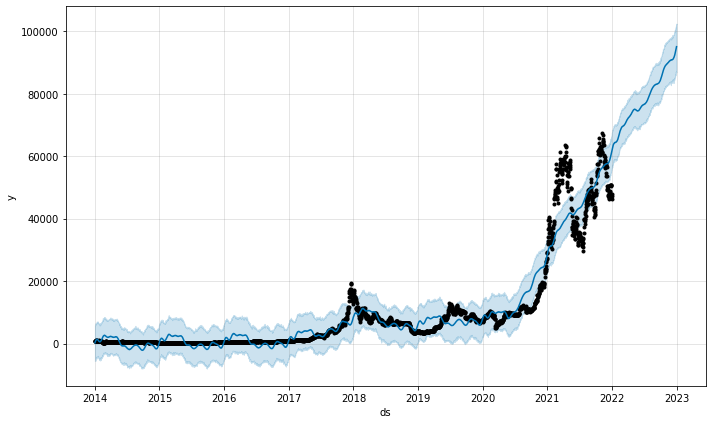

In [ ]:
ForecastCryptoFuture('bitcoin', 365, '01/01/2014','01/01/2022')


##Forcast Etherium prophit for 1 year

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/q37rot80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/1dotfx2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24251', 'data', 'file=/tmp/tmpizcgunrn/q37rot80.json', 'init=/tmp/tmpizcgunrn/1dotfx2x.json', 'output', 'file=/tmp/tmpwcextas7/prophet_model-20220827020547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-10,-8.682299,-256.872378,244.979831,-8.682299,-8.682299,-2.730004,-2.730004,-2.730004,-0.445829,-0.445829,-0.445829,-2.284175,-2.284175,-2.284175,0.0,0.0,0.0,-11.412303
1,2016-03-11,-8.587929,-277.646137,220.141787,-8.587929,-8.587929,-11.066393,-11.066393,-11.066393,-3.863911,-3.863911,-3.863911,-7.202482,-7.202482,-7.202482,0.0,0.0,0.0,-19.654322
2,2016-03-12,-8.493559,-271.969892,258.713544,-8.493559,-8.493559,-12.516638,-12.516638,-12.516638,-1.076826,-1.076826,-1.076826,-11.439812,-11.439812,-11.439812,0.0,0.0,0.0,-21.010197
3,2016-03-13,-8.399188,-286.607106,229.699843,-8.399188,-8.399188,-12.823498,-12.823498,-12.823498,2.158873,2.158873,2.158873,-14.982371,-14.982371,-14.982371,0.0,0.0,0.0,-21.222686
4,2016-03-14,-8.304818,-270.191179,233.501834,-8.304818,-8.304818,-16.445135,-16.445135,-16.445135,1.389169,1.389169,1.389169,-17.834304,-17.834304,-17.834304,0.0,0.0,0.0,-24.749953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2022-12-28,7815.967950,7148.171504,8296.928224,7312.960199,8319.960968,-104.386381,-104.386381,-104.386381,2.149743,2.149743,2.149743,-106.536124,-106.536124,-106.536124,0.0,0.0,0.0,7711.581569
2485,2022-12-29,7825.272275,7133.609612,8331.004624,7321.879828,8331.976268,-96.825065,-96.825065,-96.825065,-0.445829,-0.445829,-0.445829,-96.379236,-96.379236,-96.379236,0.0,0.0,0.0,7728.447210
2486,2022-12-30,7834.576599,7189.966909,8341.082640,7330.921141,8344.878407,-89.257268,-89.257268,-89.257268,-3.863911,-3.863911,-3.863911,-85.393357,-85.393357,-85.393357,0.0,0.0,0.0,7745.319331
2487,2022-12-31,7843.880924,7198.277022,8344.420586,7337.410064,8356.199938,-74.788695,-74.788695,-74.788695,-1.076826,-1.076826,-1.076826,-73.711869,-73.711869,-73.711869,0.0,0.0,0.0,7769.092228


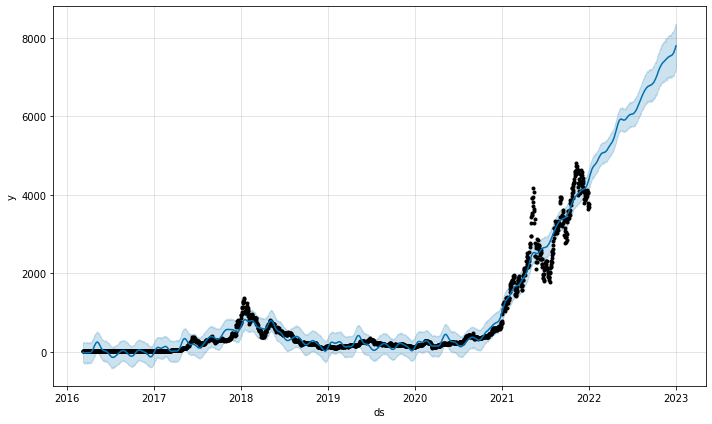

In [ ]:
ForecastCryptoFuture('Ethereum', 365, '01/01/2014','01/01/2022')

#Forcast Ripple for 1 year

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/wk1a020n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/ddisugfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42255', 'data', 'file=/tmp/tmpizcgunrn/wk1a020n.json', 'init=/tmp/tmpizcgunrn/ddisugfd.json', 'output', 'file=/tmp/tmpmtojxqcw/prophet_model-20220827020551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:05:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-22,0.001274,-0.151704,0.319218,0.001274,0.001274,0.075925,0.075925,0.075925,-0.000321,-0.000321,-0.000321,0.076246,0.076246,0.076246,0.0,0.0,0.0,0.077199
1,2015-01-23,0.001276,-0.182117,0.329054,0.001276,0.001276,0.064723,0.064723,0.064723,-0.000402,-0.000402,-0.000402,0.065125,0.065125,0.065125,0.0,0.0,0.0,0.065999
2,2015-01-24,0.001279,-0.195053,0.309855,0.001279,0.001279,0.056040,0.056040,0.056040,0.001550,0.001550,0.001550,0.054490,0.054490,0.054490,0.0,0.0,0.0,0.057319
3,2015-01-25,0.001281,-0.185549,0.289210,0.001281,0.001281,0.045941,0.045941,0.045941,0.001450,0.001450,0.001450,0.044491,0.044491,0.044491,0.0,0.0,0.0,0.047222
4,2015-01-26,0.001284,-0.182482,0.268063,0.001284,0.001284,0.035834,0.035834,0.035834,0.000576,0.000576,0.000576,0.035259,0.035259,0.035259,0.0,0.0,0.0,0.037118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,2022-12-28,1.894932,1.618637,2.342587,1.619422,2.177038,0.078039,0.078039,0.078039,-0.001273,-0.001273,-0.001273,0.079312,0.079312,0.079312,0.0,0.0,0.0,1.972971
2898,2022-12-29,1.896829,1.609044,2.364514,1.620255,2.179811,0.094092,0.094092,0.094092,-0.000321,-0.000321,-0.000321,0.094413,0.094413,0.094413,0.0,0.0,0.0,1.990921
2899,2022-12-30,1.898726,1.636726,2.375333,1.621657,2.182583,0.108465,0.108465,0.108465,-0.000402,-0.000402,-0.000402,0.108867,0.108867,0.108867,0.0,0.0,0.0,2.007191
2900,2022-12-31,1.900623,1.637590,2.398720,1.622929,2.185368,0.124031,0.124031,0.124031,0.001550,0.001550,0.001550,0.122482,0.122482,0.122482,0.0,0.0,0.0,2.024654


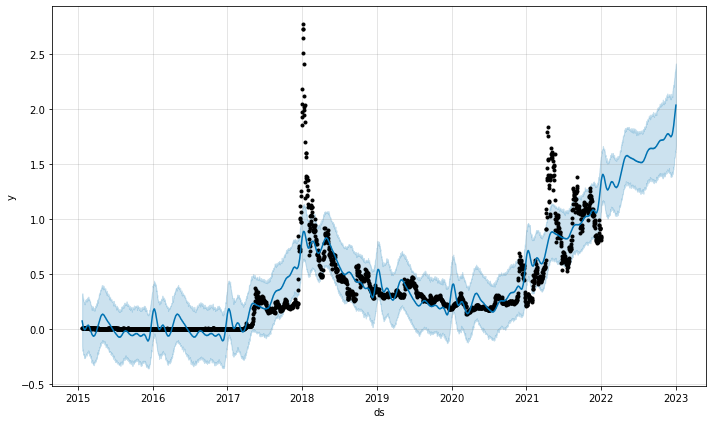

In [ ]:
ForecastCryptoFuture('XRP', 365, '01/01/2014','01/01/2022')

In [ ]:
import investpy

df = investpy.get_stock_historical_data(country='United States',
                                        from_date='01/01/2010',
                                        to_date='01/01/2020')

#Now lets prideict cross currency 

In [ ]:
from pandas.core.reshape.tile import to_datetime
currency_cross = investpy.currency_crosses.get_currency_cross_historical_data(currency_cross='EUR/USD',from_date= '01/01/2010',to_date= '01/01/2020')
currency_cross

In [ ]:
def ForecastCrossCurrencyFuture(CrossCurrency, Periods, FromDate,Todate):

  import pandas as pds
  from prophet import Prophet

  pds = pds.DataFrame()

  currency_cross = investpy.currency_crosses.get_currency_cross_historical_data(currency_cross=CrossCurrency,from_date= FromDate,to_date= Todate)

  pds["ds"] = historical_data.index
  pds["y"] = historical_data['Close'].values
  m = Prophet()
  m.fit(pds)  # df is a pandas.DataFrame with 'y' and 'ds' columns
  future = m.make_future_dataframe(periods=Periods, freq='D')
  forecast=m.predict(future)
  m.plot(forecast)

  return forecast

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/3ro8b7km.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpizcgunrn/d8wmn0py.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38303', 'data', 'file=/tmp/tmpizcgunrn/3ro8b7km.json', 'init=/tmp/tmpizcgunrn/d8wmn0py.json', 'output', 'file=/tmp/tmpgf9itvz8/prophet_model-20220827022356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:23:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:23:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,37.333243,35.361598,38.658063,37.333243,37.333243,-0.283011,-0.283011,-0.283011,-0.283011,-0.283011,-0.283011,0.0,0.0,0.0,37.050232
1,2019-01-03,37.461723,35.387171,38.684070,37.461723,37.461723,-0.397441,-0.397441,-0.397441,-0.397441,-0.397441,-0.397441,0.0,0.0,0.0,37.064282
2,2019-01-04,37.590204,35.625636,38.851667,37.590204,37.590204,-0.374484,-0.374484,-0.374484,-0.374484,-0.374484,-0.374484,0.0,0.0,0.0,37.215720
3,2019-01-07,37.975645,35.880298,39.095433,37.975645,37.975645,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,0.0,0.0,0.0,37.533026
4,2019-01-08,38.104125,35.856067,39.215015,38.104125,38.104125,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,0.0,0.0,0.0,37.552686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2020-12-26,135.581213,97.276710,173.313636,96.579865,172.165694,1.024497,1.024497,1.024497,1.024497,1.024497,1.024497,0.0,0.0,0.0,136.605710
613,2020-12-27,135.755022,97.509391,173.110444,96.587940,172.538920,1.024497,1.024497,1.024497,1.024497,1.024497,1.024497,0.0,0.0,0.0,136.779519
614,2020-12-28,135.928831,96.430456,172.463568,96.601206,172.912146,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,-0.442619,0.0,0.0,0.0,135.486212
615,2020-12-29,136.102640,96.858275,172.252365,96.670402,173.285372,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,-0.551439,0.0,0.0,0.0,135.551201


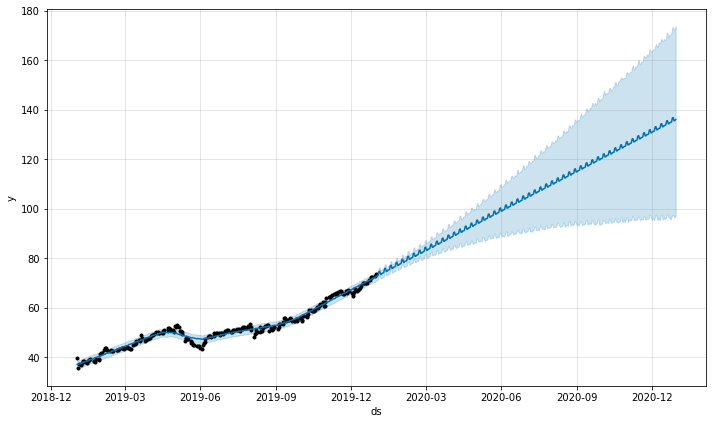

In [ ]:
ForecastCrossCurrencyFuture('EUR/USD', 365, '01/01/2010','26/08/2022')

##Congratulations now you now how to predict Crypto, Stocks, and cross currencies.

In [ ]:
from IPython.display import Image
Image(url='https://www.gifcen.com/wp-content/uploads/2022/01/clapping-gif.gif')